In [1]:
!pip3 install pandas
!pip3 install prophet

In [2]:
import pandas as pd
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import json

In [3]:
df = pd.read_csv('./london_weather.csv')

In [4]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [6]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [7]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [8]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [9]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=1826)

20:31:55 - cmdstanpy - INFO - Chain [1] start processing
20:32:00 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
17126,2025-12-27
17127,2025-12-28
17128,2025-12-29
17129,2025-12-30


In [11]:
forecast = model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.551692,7.496085,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.274352,7.677105,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.174391,7.538044,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.531393,7.448594,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.303490,7.890168,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,13.249573,3.611344,11.271715,12.881907,13.683516,-5.840213,-5.840213,-5.840213,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,13.249899,3.808090,11.012818,12.881835,13.684151,-5.840961,-5.840961,-5.840961,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,13.250225,3.450107,11.125773,12.881762,13.684787,-5.876358,-5.876358,-5.876358,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,13.250551,3.707415,11.270225,12.881690,13.685422,-5.919392,-5.919392,-5.919392,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


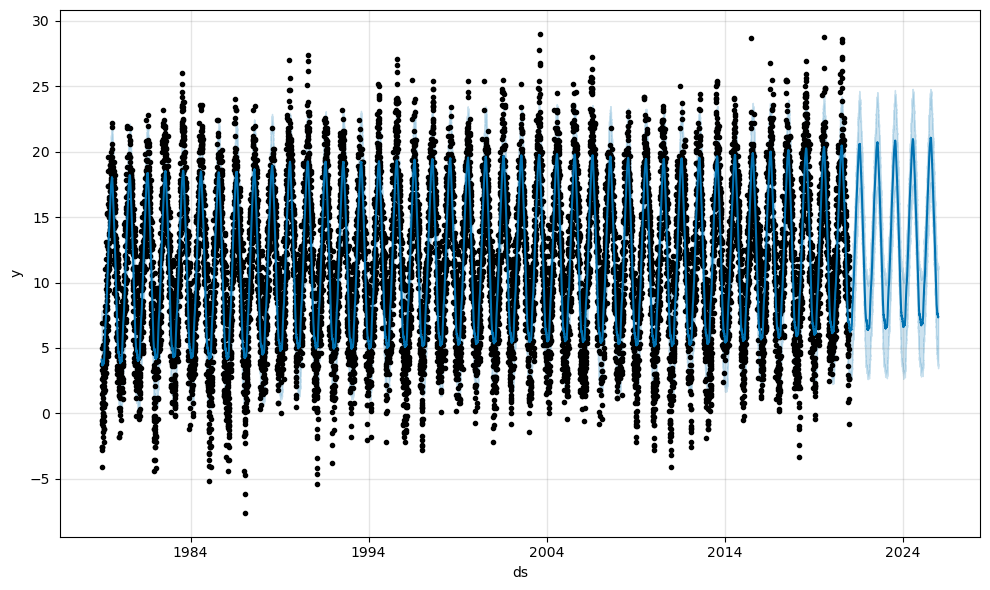

In [13]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)

In [14]:
max_df = df[['date', 'max_temp']]
max_df = max_df.rename(columns={'date':'ds', 'max_temp': 'y'})

min_df = df[['date', 'min_temp']]
min_df = min_df.rename(columns={'date':'ds', 'min_temp': 'y'})

In [15]:
model_max = Prophet()
model_max.fit(max_df)
future_max = model_max.make_future_dataframe(periods=1825)

model_min = Prophet()
model_min.fit(min_df)
future_min = model_min.make_future_dataframe(periods=1825)

20:32:13 - cmdstanpy - INFO - Chain [1] start processing
20:32:18 - cmdstanpy - INFO - Chain [1] done processing
20:32:21 - cmdstanpy - INFO - Chain [1] start processing
20:32:25 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast_max = model_max.predict(future_max)

forecast_min = model_min.predict(future_min)

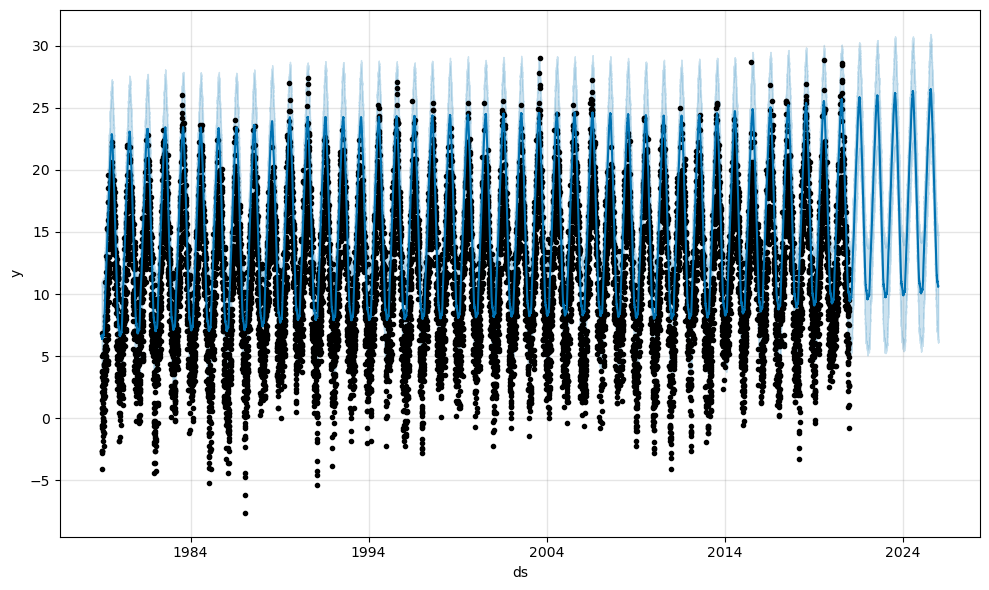

In [17]:
fig_max = model.plot(forecast_max)

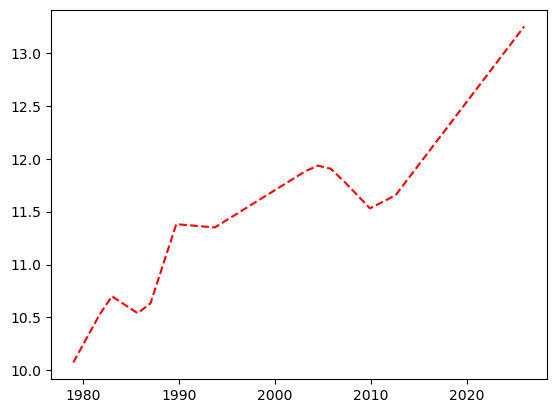

In [18]:
linear_reg_line = plt.plot(forecast['ds'], forecast['trend'], linestyle='--', color='red', label='Linear Regression Line')

In [19]:
forecast = forecast.set_index('ds')

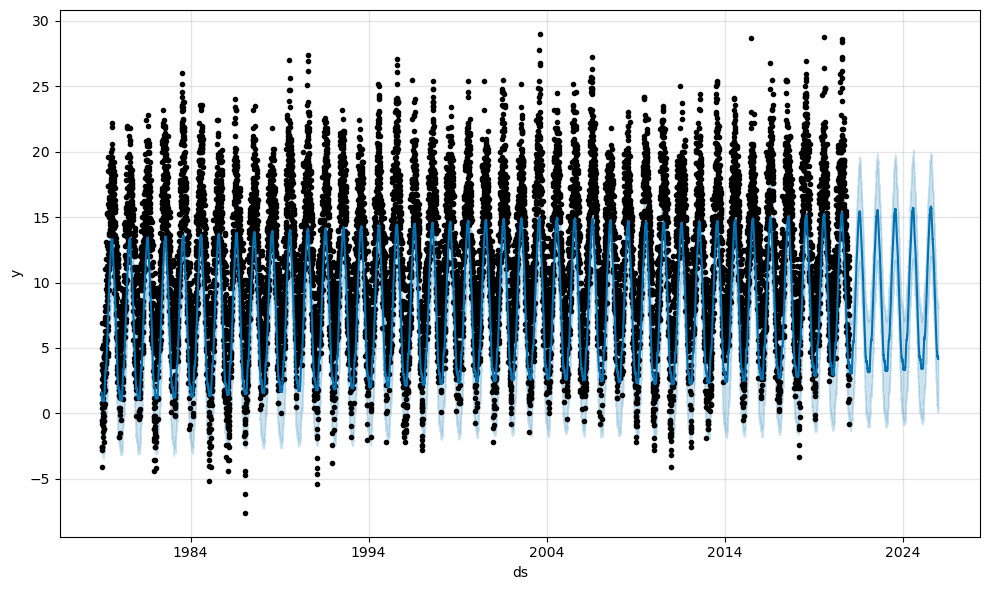

In [20]:
fig_min = model.plot(forecast_min)

<Axes: xlabel='ds'>

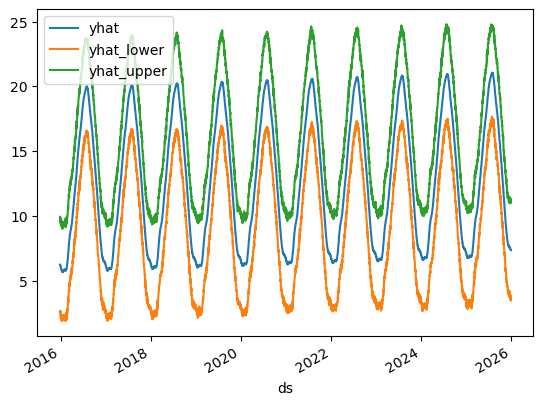

In [21]:
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-3650:,:].plot()

In [22]:
# Prophet forecast with smaller dataseries

In [23]:
# MAPE calculation using weather API

In [24]:
api = "http://api.openweathermap.org/geo/1.0/direct?q=London&limit=5&appid=284e496da06f1c5662d7a763ce4950b8"

get_api = requests.get(api)
get_api

<Response [200]>

In [25]:
get_api.json()

[{'name': 'London',
  'local_names': {'fy': 'Londen',
   'sr': 'Лондон',
   'st': 'London',
   'na': 'London',
   'lo': 'ລອນດອນ',
   'th': 'ลอนดอน',
   'ce': 'Лондон',
   'su': 'London',
   'ky': 'Лондон',
   'bi': 'London',
   'ur': 'علاقہ لندن',
   'fr': 'Londres',
   'ay': 'London',
   'lv': 'Londona',
   'oc': 'Londres',
   'ro': 'Londra',
   'lb': 'London',
   'ku': 'London',
   'af': 'Londen',
   'to': 'Lonitoni',
   'os': 'Лондон',
   'ie': 'London',
   'li': 'Londe',
   'en': 'London',
   'kn': 'ಲಂಡನ್',
   'gv': 'Lunnin',
   'ab': 'Лондон',
   'ny': 'London',
   'ms': 'London',
   'lt': 'Londonas',
   'kl': 'London',
   'sd': 'لنڊن',
   'cu': 'Лондонъ',
   'mk': 'Лондон',
   'ru': 'Лондон',
   'sq': 'Londra',
   'is': 'London',
   'eu': 'Londres',
   'ne': 'लन्डन',
   'he': 'לונדון',
   'id': 'London',
   'tw': 'London',
   'da': 'London',
   'ht': 'Lonn',
   'ascii': 'London',
   'ca': 'Londres',
   'kw': 'Loundres',
   'sn': 'London',
   'bm': 'London',
   'qu': 'London',
   

In [26]:
london = get_api.json()[0]
london

{'name': 'London',
 'local_names': {'fy': 'Londen',
  'sr': 'Лондон',
  'st': 'London',
  'na': 'London',
  'lo': 'ລອນດອນ',
  'th': 'ลอนดอน',
  'ce': 'Лондон',
  'su': 'London',
  'ky': 'Лондон',
  'bi': 'London',
  'ur': 'علاقہ لندن',
  'fr': 'Londres',
  'ay': 'London',
  'lv': 'Londona',
  'oc': 'Londres',
  'ro': 'Londra',
  'lb': 'London',
  'ku': 'London',
  'af': 'Londen',
  'to': 'Lonitoni',
  'os': 'Лондон',
  'ie': 'London',
  'li': 'Londe',
  'en': 'London',
  'kn': 'ಲಂಡನ್',
  'gv': 'Lunnin',
  'ab': 'Лондон',
  'ny': 'London',
  'ms': 'London',
  'lt': 'Londonas',
  'kl': 'London',
  'sd': 'لنڊن',
  'cu': 'Лондонъ',
  'mk': 'Лондон',
  'ru': 'Лондон',
  'sq': 'Londra',
  'is': 'London',
  'eu': 'Londres',
  'ne': 'लन्डन',
  'he': 'לונדון',
  'id': 'London',
  'tw': 'London',
  'da': 'London',
  'ht': 'Lonn',
  'ascii': 'London',
  'ca': 'Londres',
  'kw': 'Loundres',
  'sn': 'London',
  'bm': 'London',
  'qu': 'London',
  'hr': 'London',
  'se': 'London',
  'om': 'Landan',


In [27]:
london['lat']

51.5073219

In [28]:
london['lon']

-0.1276474

In [29]:
london_api = "https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric"
london_api

'https://api.openweathermap.org/data/3.0/onecall?lat=51.51&lon=-0.13&exclude=current,minutely,hourly,alerts&appid=77ab0d254ac9b998b6aabc97fcdd0896&units=metric'

In [30]:
def get_api_london():
    response = requests.get(london_api)
    return response

api_response = get_api_london()

dates = []
min_temps = []
max_temps = []
max_temps = []
mean_temps = []

if api_response.status_code == 200:
    
    data = api_response.json()
        
    daily_forecast = data['daily']

    for day in daily_forecast:
        date = day['dt']
        min_temp = day['temp']['min']
        max_temp = day['temp']['max']
        mean_temp = day['temp']['day']
        

        
        dates.append(date)
        min_temps.append(min_temp)
        max_temps.append(max_temp)
        mean_temps.append(mean_temp)

else:
    print("Error: Unable to fetch data from the API.")
    
weather_df = pd.DataFrame({
    'ds': dates,
    'Minimum Temperature (C)': min_temps,
    'Maximum Temperature (C)': max_temps,
    'Average Temperature (C)': mean_temps
})

weather_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C)
0,1707480000,9.38,11.45,11.18
1,1707566400,7.00,11.00,10.56
2,1707652800,5.45,8.02,8.02
3,1707739200,3.77,9.68,9.08
4,1707825600,3.72,9.48,8.50
5,1707912000,3.29,9.09,7.49
6,1707998400,9.36,11.23,11.23
7,1708084800,9.51,12.92,11.32


In [31]:
weather_df["ds"] = weather_df["ds"]-(12*60*60)

In [52]:
weather_df.dtypes

ds                         datetime64[ns]
Minimum Temperature (C)           float64
Maximum Temperature (C)           float64
Average Temperature (C)           float64
dtype: object

In [53]:
weather_df['ds'] = pd.to_datetime(weather_df['ds'], unit='s')

In [54]:
mape_df = pd.merge(weather_df,forecast, on= "ds", how = "outer")
mape_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-02-09,9.38,11.45,11.18,13.025662,2.825931,10.221009,12.847676,13.230274,-6.266793,...,-0.008151,-0.008151,-0.008151,-6.258642,-6.258642,-6.258642,0.0,0.0,0.0,6.758869
1,2024-02-10,7.00,11.00,10.56,13.025988,3.052093,10.453653,12.847761,13.230802,-6.293434,...,-0.028972,-0.028972,-0.028972,-6.264461,-6.264461,-6.264461,0.0,0.0,0.0,6.732555
2,2024-02-11,5.45,8.02,8.02,13.026314,3.201297,10.296544,12.847846,13.231330,-6.271805,...,-0.002883,-0.002883,-0.002883,-6.268922,-6.268922,-6.268922,0.0,0.0,0.0,6.754509
3,2024-02-12,3.77,9.68,9.08,13.026640,3.189524,10.683885,12.847931,13.231857,-6.280234,...,-0.009022,-0.009022,-0.009022,-6.271213,-6.271213,-6.271213,0.0,0.0,0.0,6.746406
4,2024-02-13,3.72,9.48,8.50,13.026966,3.014018,10.497446,12.848016,13.232385,-6.291038,...,-0.020539,-0.020539,-0.020539,-6.270499,-6.270499,-6.270499,0.0,0.0,0.0,6.735928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,3.611344,11.271715,12.881907,13.683516,-5.840213,...,-0.028972,-0.028972,-0.028972,-5.811241,-5.811241,-5.811241,0.0,0.0,0.0,7.409360
17127,2025-12-28,NaN,NaN,NaN,13.249899,3.808090,11.012818,12.881835,13.684151,-5.840961,...,-0.002883,-0.002883,-0.002883,-5.838078,-5.838078,-5.838078,0.0,0.0,0.0,7.408938
17128,2025-12-29,NaN,NaN,NaN,13.250225,3.450107,11.125773,12.881762,13.684787,-5.876358,...,-0.009022,-0.009022,-0.009022,-5.867337,-5.867337,-5.867337,0.0,0.0,0.0,7.373867
17129,2025-12-30,NaN,NaN,NaN,13.250551,3.707415,11.270225,12.881690,13.685422,-5.919392,...,-0.020539,-0.020539,-0.020539,-5.898853,-5.898853,-5.898853,0.0,0.0,0.0,7.331159


In [56]:
mape_df = mape_df[["ds","Minimum Temperature (C)","Maximum Temperature (C)","Average Temperature (C)","trend","trend_lower","trend_upper"]]
mape_df

,ds,Minimum Temperature (C),Maximum Temperature (C),Average Temperature (C),trend,trend_lower,trend_upper
0,2024-02-09,9.38,11.45,11.18,13.025662,12.847676,13.230274
1,2024-02-10,7.00,11.00,10.56,13.025988,12.847761,13.230802
2,2024-02-11,5.45,8.02,8.02,13.026314,12.847846,13.231330
3,2024-02-12,3.77,9.68,9.08,13.026640,12.847931,13.231857
4,2024-02-13,3.72,9.48,8.50,13.026966,12.848016,13.232385
...,...,...,...,...,...,...,...
17126,2025-12-27,NaN,NaN,NaN,13.249573,12.881907,13.683516
17127,2025-12-28,NaN,NaN,NaN,13.249899,12.881835,13.684151
17128,2025-12-29,NaN,NaN,NaN,13.250225,12.881762,13.684787
17129,2025-12-30,NaN,NaN,NaN,13.250551,12.881690,13.685422


In [36]:
#MAPE - mean temp

In [57]:
mape_df['Absolute Error'] = abs(mape_df['Average Temperature (C)'] - mape_df['trend'])
mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Average Temperature (C)']) * 100
mape_df['Absolute Percentage Error'] = abs(mape_df['Percentage Error'])
mape_df['MAPE_mean'] = mape_df['Absolute Percentage Error'].mean()


<Axes: xlabel='ds'>

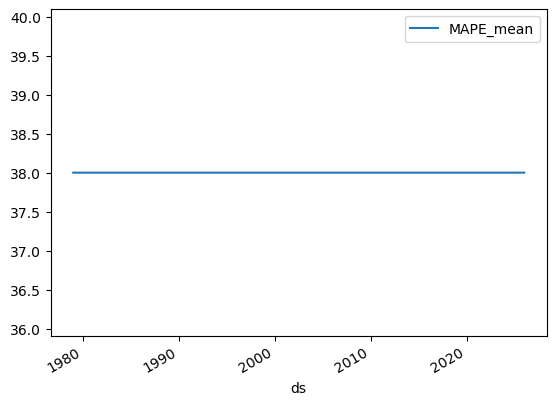

In [58]:
mape_df.plot(x='ds',y='MAPE_mean')

In [59]:
#MAPE - min temp

In [60]:
mape_df['Absolute Error'] = abs(mape_df['Minimum Temperature (C)'] - mape_df['trend_lower'])
mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Minimum Temperature (C)']) * 100
mape_df['Absolute Percentage Error'] = abs(mape_df['Percentage Error'])
mape_df['MAPE_min'] = mape_df['Absolute Percentage Error'].mean()

<Axes: xlabel='ds'>

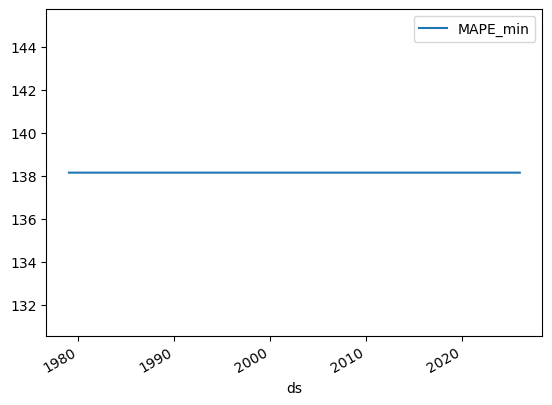

In [61]:
mape_df.plot(x='ds',y='MAPE_min')

In [62]:
#MAPE - max temp

In [63]:
mape_df['Absolute Error'] = abs(mape_df['Maximum Temperature (C)'] - mape_df['trend_upper'])
mape_df['Percentage Error'] = (mape_df['Absolute Error'] / mape_df['Maximum Temperature (C)']) * 100
mape_df['Absolute Percentage Error'] = abs(mape_df['Percentage Error'])
mape_df['MAPE_max'] = mape_df['Absolute Percentage Error'].mean()

<Axes: xlabel='ds'>

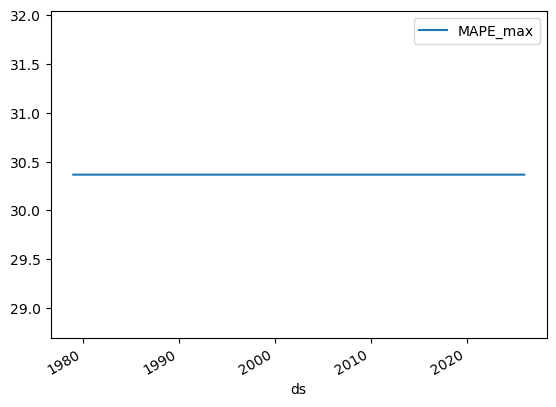

In [44]:
mape_df.plot(x='ds',y='MAPE_max')

In [45]:
##Cross Validation

In [46]:
prophet_validation = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/80 [00:00<?, ?it/s]

20:32:54 - cmdstanpy - INFO - Chain [1] start processing
20:32:54 - cmdstanpy - INFO - Chain [1] done processing
20:32:55 - cmdstanpy - INFO - Chain [1] start processing
20:32:55 - cmdstanpy - INFO - Chain [1] done processing
20:32:56 - cmdstanpy - INFO - Chain [1] start processing
20:32:56 - cmdstanpy - INFO - Chain [1] done processing
20:32:57 - cmdstanpy - INFO - Chain [1] start processing
20:32:57 - cmdstanpy - INFO - Chain [1] done processing
20:32:58 - cmdstanpy - INFO - Chain [1] start processing
20:32:58 - cmdstanpy - INFO - Chain [1] done processing
20:32:59 - cmdstanpy - INFO - Chain [1] start processing
20:33:00 - cmdstanpy - INFO - Chain [1] done processing
20:33:00 - cmdstanpy - INFO - Chain [1] start processing
20:33:01 - cmdstanpy - INFO - Chain [1] done processing
20:33:02 - cmdstanpy - INFO - Chain [1] start processing
20:33:02 - cmdstanpy - INFO - Chain [1] done processing
20:33:03 - cmdstanpy - INFO - Chain [1] start processing
20:33:03 - cmdstanpy - INFO - Chain [1]

20:37:41 - cmdstanpy - INFO - Chain [1] done processing
20:37:45 - cmdstanpy - INFO - Chain [1] start processing
20:37:48 - cmdstanpy - INFO - Chain [1] done processing
20:37:51 - cmdstanpy - INFO - Chain [1] start processing
20:37:54 - cmdstanpy - INFO - Chain [1] done processing
20:37:57 - cmdstanpy - INFO - Chain [1] start processing
20:38:02 - cmdstanpy - INFO - Chain [1] done processing
20:38:05 - cmdstanpy - INFO - Chain [1] start processing
20:38:09 - cmdstanpy - INFO - Chain [1] done processing
20:38:12 - cmdstanpy - INFO - Chain [1] start processing
20:38:15 - cmdstanpy - INFO - Chain [1] done processing
20:38:19 - cmdstanpy - INFO - Chain [1] start processing
20:38:24 - cmdstanpy - INFO - Chain [1] done processing
20:38:27 - cmdstanpy - INFO - Chain [1] start processing
20:38:30 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
prophet_validation

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1981-01-26,4.652565,1.535703,7.848092,6.3,1981-01-25
1,1981-01-27,4.737007,1.583069,8.057805,8.4,1981-01-25
2,1981-01-28,4.819212,1.424648,8.182454,7.2,1981-01-25
3,1981-01-29,4.863783,1.426280,8.157564,7.0,1981-01-25
4,1981-01-30,4.620855,1.437363,7.905959,0.1,1981-01-25
...,...,...,...,...,...,...
29125,2020-12-27,6.717418,3.127831,10.210770,7.5,2020-01-01
29126,2020-12-28,6.700298,3.042050,10.286646,1.1,2020-01-01
29127,2020-12-29,6.652531,3.288299,10.487609,2.6,2020-01-01
29128,2020-12-30,6.682577,2.887705,10.506157,2.7,2020-01-01


In [48]:
prophet_performance = performance_metrics(prophet_validation)
prophet_performance

,horizon,mse,rmse,mae,mdape,smape,coverage
0,37 days,8.292955,2.879749,2.307591,0.171572,0.294249,0.787753
1,38 days,8.234724,2.869621,2.300345,0.170069,0.295072,0.789516
2,39 days,8.193117,2.862362,2.295865,0.169223,0.295465,0.791280
3,40 days,8.243258,2.871107,2.304726,0.170174,0.297539,0.790594
4,41 days,8.255745,2.873281,2.307808,0.170174,0.297949,0.791109
...,...,...,...,...,...,...,...
324,361 days,9.010016,3.001669,2.422599,0.185046,0.302320,0.776004
325,362 days,9.044015,3.007327,2.426777,0.184527,0.303167,0.775236
326,363 days,8.994570,2.999095,2.417881,0.184104,0.302354,0.775764
327,364 days,8.986715,2.997785,2.416946,0.183212,0.302255,0.776099


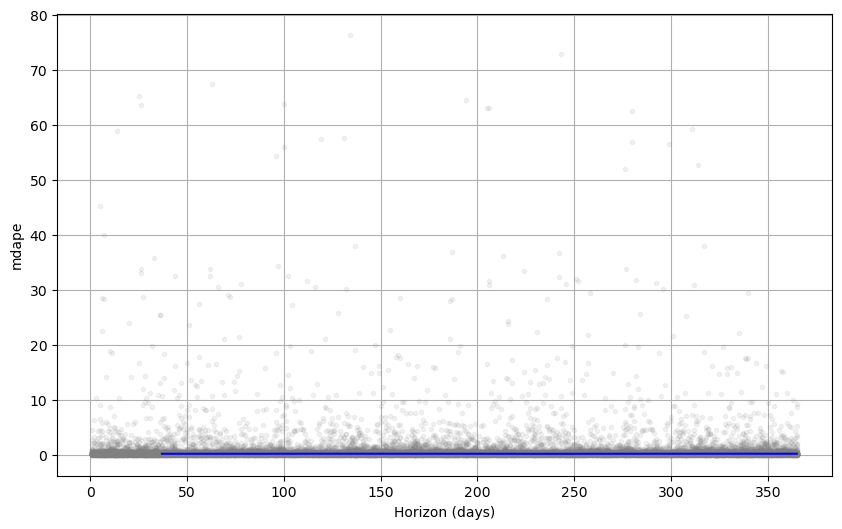

In [49]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')

(0.0, 1.0)

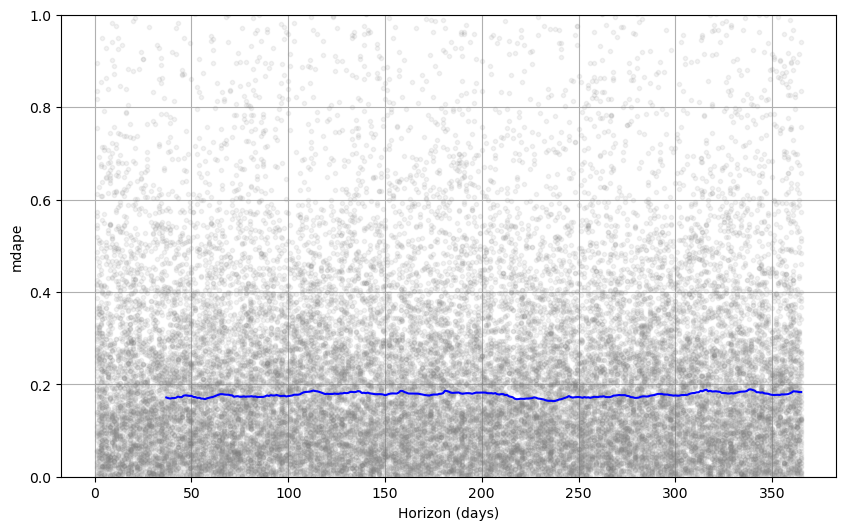

In [50]:
plot = plot_cross_validation_metric(prophet_validation, metric='mdape')
plt.ylim(0,1)

In [51]:
# Over time the changes stay consistent around 18%